In [70]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

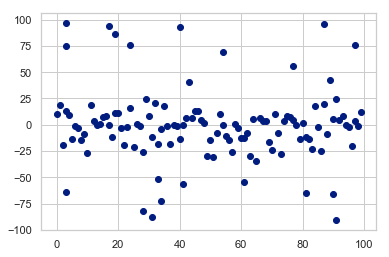

In [34]:
Y = np.random.normal(0, 15, 100).reshape(100, 1)
Y = np.append(Y, np.random.randint(50, 100, size=10))
Y = np.append(Y, np.random.randint(-100, -50, size=10))
X = np.arange(100).reshape(100, 1)
X = np.append(X, np.random.randint(1, 100, size=20))
plt.scatter(X, Y)

In [35]:
def normalize_var(data):
    return (data - data.mean()) / data.std()

# least squares algorithm
# matrix implement
def least_squares(x, y):
    x = normalize_var(x)
    y = normalize_var(y)
    N = np.size(x,0) # total number of data
    x = np.vstack((x,np.ones(N))).T
    A = x.T@x
    f = x.T@y
    kb = np.linalg.solve(A, f)
    return kb

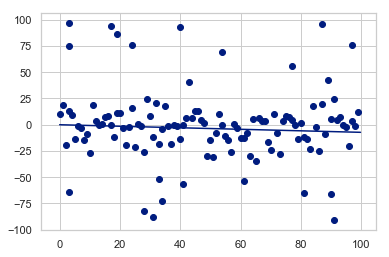

In [36]:
k, b = least_squares(X, Y)
t = np.arange(0, 100, 0.2)
plt.plot(t, k*t + b)
plt.scatter(X, Y)
plt.show()

In [48]:
def ransac(x, y):
    x = normalize_var(x)
    y = normalize_var(y)
    N = x.shape[0]
    # the iters value will optime in each loop
    iters = 100000
    sigma = 0.25
    res_k, res_b = 0, 0
    total = 0
    P = 0.99
    for i in range(iters):
        x_1, x_2 = np.random.choice(x, size=2)
        y_1, y_2 = np.random.choice(y, size=2)
        k = (y_2 - y_1) / (x_2 - x_1)
        b = y_1 - k * x_1
        
        inlier_num = 0
        for i in range(N):
            y_temp = k * x[i] + b
            if abs(y_temp - y[i]) < sigma:
                inlier_num += 1
        
        if inlier_num > total:
            iters = math.log(1 - P) / math.log(1 - math.pow(inlier_num / N, 2))
            total = inlier_num
            res_k, res_b = k, b
        
        if inlier_num > N / 2:
            return [res_k, res_b]
    return [res_k, res_b]

C:\Python\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Python\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\Python\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


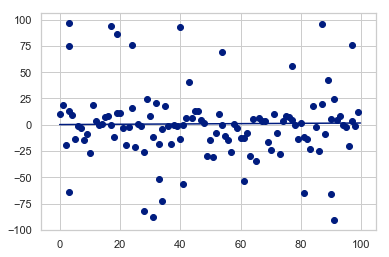

In [49]:
k, b = ransac(X, Y)
t = np.arange(0, 100, 0.2)
plt.plot(t, k*t + b)
plt.scatter(X, Y)
plt.show()

In [65]:
def hough_transform(x, y):
    x = normalize_var(x)
    y = normalize_var(y)
    N = x.shape[0]
    sin_val = np.array([math.sin(i * math.pi / 180)
                for i in range(-90, 90)])
    cos_val = np.array([math.cos(i * math.pi / 180)
                for i in range(-90, 90)])
    hough = np.array([([0] * 180)
                for i in range(
                math.floor(np.max(sin_val) * np.max(x) +
                    np.max(cos_val) * np.max(y))
                )])
    total = 0
    sin_res, cos_res = 0, 0
    for i in range(N):
        for j in range(N):
            for k in range(180):
                tp = math.floor(sin_val[k] * y[j] + cos_val[k] * x[i])
                hough[tp][k] += 1
                if hough[tp][k] > total:
                    total = hough[tp][k]
                    sin_res, cos_res = sin_val[k], cos_val[k]
                    p = sin_val[k] * y[j] + cos_val[k] * x[i]
    return [sin_res, cos_res, p]
        

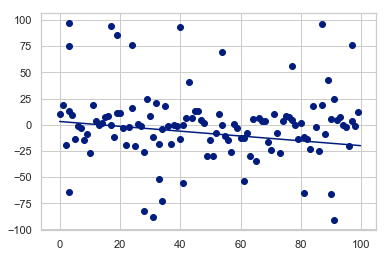

In [66]:
sin_res, cos_res, p = hough_transform(X, Y)
t = np.arange(0, 100, 0.2)
plt.plot(t, (p - t * cos_res) / sin_res)
plt.scatter(X, Y)
plt.show()

In [ ]:
def canny_img(url):
    img = cv2.imread(url, 0)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    canny = cv2.Canny(img, 50, 255)
    lines = cv2.HoughLines(canny, 1, np.pi/180, 200)
    for line in lines:
        rho, theta = line[0]
        k = np.cos(theta)
        b = np.sin(theta)
        x0 = k * rho
        y0 = b * rho
        # start
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (k))
        # end
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (k))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        print(line)
    cv2.imshow('Canny HoughLines', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
canny_img('./img.png')